Размер данных: (1970, 7)

Первые 3 строки:
  Review #      Brand                                            Variety  \
0     2580  New Touch                          T's Restaurant Tantanmen    
1     2579   Just Way  Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...   
2     2578     Nissin                      Cup Noodles Chicken Vegetable   

  Style Country Stars Top Ten  
0   Cup   Japan  3.75     NaN  
1  Pack  Taiwan     1     NaN  
2   Cup     USA  2.25     NaN  

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1970 entries, 0 to 1969
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  1970 non-null   object
 1   Brand     1956 non-null   object
 2   Variety   1956 non-null   object
 3   Style     1955 non-null   object
 4   Country   1956 non-null   object
 5   Stars     1956 non-null   object
 6   Top Ten   30 non-null     object
dtypes: object(7)
memory usage: 107.9+ KB
None

Пропущ

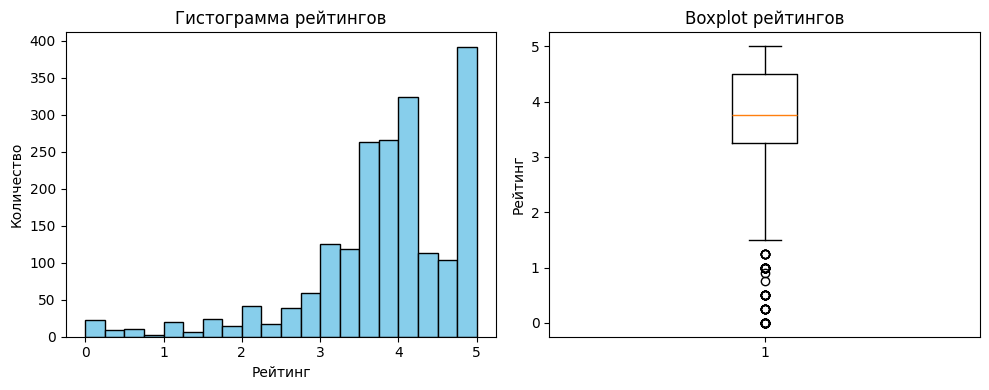

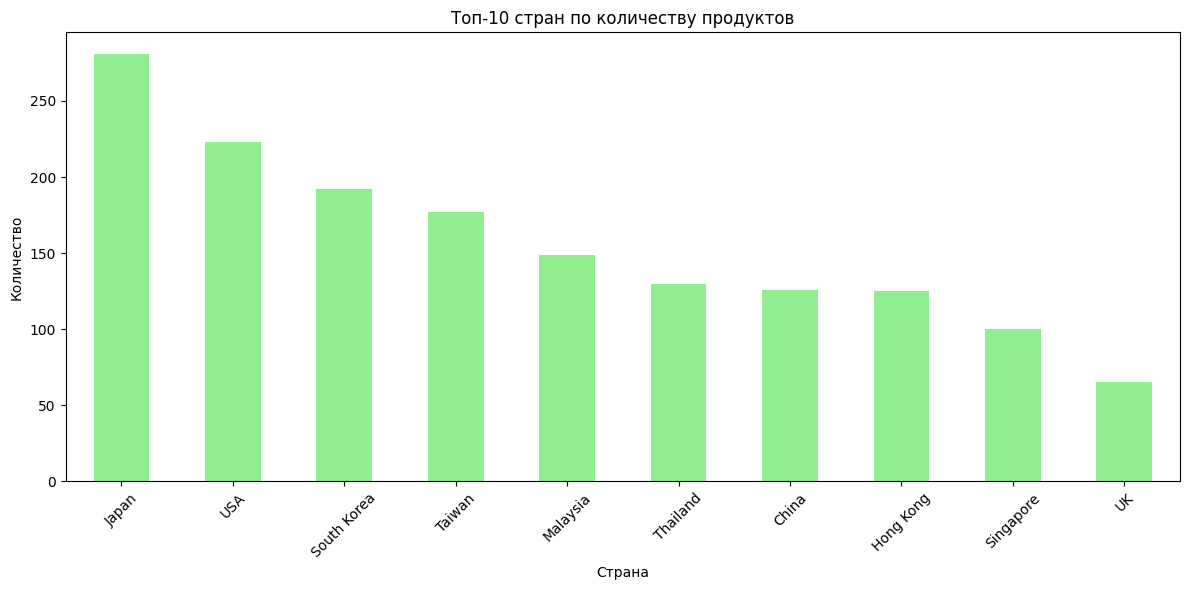

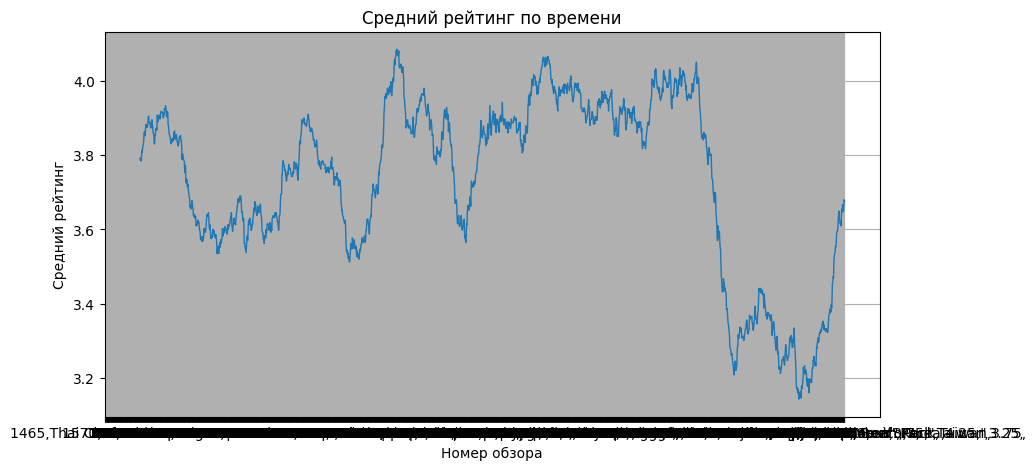


Средний рейтинг по странам:
Country
Brazil         4.350000
Sarawak        4.333333
Cambodia       4.200000
Malaysia       4.189484
Singapore      4.152500
Japan          4.057918
Indonesia      4.007937
Myanmar        3.946429
South Korea    3.936673
Hong Kong      3.834800
Name: Stars, dtype: float64

Количество продуктов по странам:
Country
Japan          281
USA            223
South Korea    192
Taiwan         177
Malaysia       149
Thailand       130
China          126
Hong Kong      125
Singapore      100
UK              65
Name: Review #, dtype: int64

Рейтинги по типам упаковки:
         mean  count   min   max
Style                           
Bar      5.00      1  5.00  5.00
Bowl     3.80    346  0.00  5.00
Box      4.29      6  1.50  5.00
Can      3.50      1  3.50  3.50
Cup      3.55    385  0.00  5.00
Pack     3.78   1147  0.00  5.00
Tray     3.56     69  0.00  5.00
Unknown  3.73     15  3.73  3.75

Сводная таблица (первые 5 стран):
Style       Bar     Bowl  Box  Can      

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('ramen-ratings.csv')
print("Размер данных:", df.shape)
print("\nПервые 3 строки:")
print(df.head(3))
print("\nИнформация о данных:")
print(df.info())
df['Stars'] = pd.to_numeric(df['Stars'], errors='coerce')
print("\nПропущенные значения:")
print(df.isnull().sum())
df['Stars'] = df['Stars'].fillna(df['Stars'].mean())
df['Style'] = df['Style'].fillna('Unknown')
df['Top Ten'] = df['Top Ten'].fillna('No')
print("\nДубликаты до удаления:", df.duplicated().sum())
df = df.drop_duplicates()
print("Дубликаты после удаления:", df.duplicated().sum())
print("\nОсновная статистика:")
print(df['Stars'].describe())
print("\nКоличество по странам:")
print(df['Country'].value_counts().head(10))
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(df['Stars'], bins=20, color='skyblue', edgecolor='black')
plt.title('Гистограмма рейтингов')
plt.xlabel('Рейтинг')
plt.ylabel('Количество')
plt.subplot(1, 2, 2)
plt.boxplot(df['Stars'])
plt.title('Boxplot рейтингов')
plt.ylabel('Рейтинг')
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
df['Country'].value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.title('Топ-10 стран по количеству продуктов')
plt.xlabel('Страна')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 5))
df_sorted = df.sort_values('Review #')
plt.plot(df_sorted['Review #'], df_sorted['Stars'].rolling(100).mean(), linewidth=1)
plt.title('Средний рейтинг по времени')
plt.xlabel('Номер обзора')
plt.ylabel('Средний рейтинг')
plt.grid(True)
plt.show()

numeric_df = df.select_dtypes(include=[np.number])
if len(numeric_df.columns) > 1:
    plt.figure(figsize=(6, 4))
    correlation = numeric_df.corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm')
    plt.title('Корреляция числовых данных')
    plt.tight_layout()
    plt.show()
print("\nСредний рейтинг по странам:")
print(df.groupby('Country')['Stars'].mean().sort_values(ascending=False).head(10))
print("\nКоличество продуктов по странам:")
print(df.groupby('Country')['Review #'].count().sort_values(ascending=False).head(10))
print("\nРейтинги по типам упаковки:")
print(df.groupby('Style')['Stars'].agg(['mean', 'count', 'min', 'max']).round(2))
pivot_table = pd.pivot_table(df, 
                            values='Stars', 
                            index='Country', 
                            columns='Style', 
                            aggfunc='mean',
                            fill_value=0)
print("\nСводная таблица (первые 5 стран):")
print(pivot_table.head(5))
print("ИТОГИ:")
print(f"Всего продуктов: {len(df)}")
print(f"Средний рейтинг: {df['Stars'].mean():.2f}")
print(f"Самый высокий рейтинг: {df['Stars'].max():.2f}")
print(f"Количество стран: {df['Country'].nunique()}")

df.to_csv('ramen_processed.csv', index=False)
print("Данные сохранены в 'ramen_processed.csv'")